# Tiny Zero-Shot-Classifier

Basieren auf der Huggingfaces `zero-shot-classification` wird ein Tiny Classifer erzeugt.

In einem ersten Schritt werden die benötigten Arbeitspakete und die HEX-Probedaten geladen:

In [6]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline

import pandas as pd
df = pd.read_excel('C:/Users/mhu/Documents/gitlab/future_skill_classification/data/hex_info_prep.xlsx')
df = df.sample(n=100)

df.head(30)

,Unnamed: 0,titel_kursbesch
8894,16134,programmierung paralleler systeme in der vorle...
23603,33233,spezialgebiete der signalverarbeitung das proj...
17204,1815,postdesktop user interfaces siehe modulbeschre...
40052,29892,logik und diskrete mathematik aussagenlogik un...
21671,44830,programmierung für die digital humanities this...
17433,8099,praktikum internetpraktikum ilab in in in in...
37614,13973,masterprojekt wirtschaftsinformatik und untern...
34145,8172,medical augmented reality in lecture covering...
42296,33005,spezialgebiete der signalverarbeitung das proj...
25520,47342,data science


# Vorbereiten des Klassifiziers

In [8]:
classifier = pipeline("zero-shot-classification")


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

C:\Users\mhu\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mhu\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [10]:
candidate_labels = ["Data Analytics & künstliche Intelligenz", "Softwareentwicklung", "IT-Architektur", "Hardware-/Robotikentwicklung", "Quantencomputing"]

# Durchführen der Klassifiziers

In [11]:
candidate_results = [0, 0, 0, 0, 0]

for sent in tqdm(df['titel_kursbesch'].values): #tqdm für Fortschrittsanzeige
    # To do multi-class classification, simply pass multi_label=True.
    # In this case, the scores will be independent, but each will fall between 0 and 1.
    res = classifier(sent, candidate_labels) # multi_label=True)

    if res['labels'][0] == 'Data Analytics & künstliche Intelligenz' and res['scores'][0] > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if res['labels'][0] == 'Softwareentwicklung' and res['scores'][0] > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if res['labels'][0] == 'IT-Architektur' and res['scores'][0] > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if res['labels'][0] == 'Hardware-/Robotikentwicklung' and res['scores'][0] > 0.5:
        candidate_results[3] = candidate_results[3] + 1
    if res['labels'][0] == 'Quantencomputing' and res['scores'][0] > 0.5:
        candidate_results[4] = candidate_results[4] + 1

    if res['scores'][0] > 0.5: # Wenn der Score des ersten Labels größer als 0,5 ist: Print!
        print(sent)
        print(res['labels'])
        print(res['scores'])
        print('\n')

print(candidate_results)


  3%|▎         | 3/100 [00:14<06:11,  3.83s/it]

postdesktop user interfaces siehe modulbeschreibung
['Softwareentwicklung', 'IT-Architektur', 'Quantencomputing', 'Data Analytics & künstliche Intelligenz', 'Hardware-/Robotikentwicklung']
[0.5707548260688782, 0.2500983476638794, 0.10202477127313614, 0.04808226600289345, 0.02903980389237404]




  7%|▋         | 7/100 [00:30<06:31,  4.21s/it]

masterprojekt wirtschaftsinformatik und unternehmensmodellierung anmeldung nach persönlicher kontaktaufnahme zum lehrstuhl
['Softwareentwicklung', 'Data Analytics & künstliche Intelligenz', 'IT-Architektur', 'Hardware-/Robotikentwicklung', 'Quantencomputing']
[0.6047933101654053, 0.18229953944683075, 0.14206384122371674, 0.03857811912894249, 0.032265134155750275]




 10%|█         | 10/100 [01:02<11:18,  7.54s/it]

data science
['Data Analytics & künstliche Intelligenz', 'Quantencomputing', 'IT-Architektur', 'Softwareentwicklung', 'Hardware-/Robotikentwicklung']
[0.6356037259101868, 0.2112228274345398, 0.06421464681625366, 0.05358753353357315, 0.0353713184595108]




 12%|█▏        | 12/100 [01:14<09:16,  6.32s/it]

magnetic resonance imaging   übung
['IT-Architektur', 'Quantencomputing', 'Softwareentwicklung', 'Hardware-/Robotikentwicklung', 'Data Analytics & künstliche Intelligenz']
[0.5630857944488525, 0.12962141633033752, 0.1232854574918747, 0.0993197113275528, 0.08468760550022125]




 13%|█▎        | 13/100 [01:16<07:25,  5.12s/it]

masterpraktikum  automotive software entwicklung in in siehe webseite zum praktikum
['Softwareentwicklung', 'IT-Architektur', 'Quantencomputing', 'Hardware-/Robotikentwicklung', 'Data Analytics & künstliche Intelligenz']
[0.9541510343551636, 0.01891213096678257, 0.010375277139246464, 0.00832077395170927, 0.008240772411227226]




 26%|██▌       | 26/100 [03:05<14:01, 11.37s/it]

softwareprojekt datenanalyse für natürliche sprache  große datenmengen sind heute eine wertvolle informationsquelle allerdings ist nur durch die verwendung von intelligenter datenanalyse das volle potential dieser daten nutzbar solche methoden ermöglichen es neue und praktisch nutzbare informationen in großen natürlichsprachlichen daten zu identifizieren und unterstützen dadurch die entscheidungsfindung bei komplexen aufgaben in diesem projekt werden studenten eigene ideen und neue softwaresysteme entwickeln die es ermöglichen informationen für verschiedene aufgaben aus einer großen menge natürlichsprachlicher texte big data zu extrahieren das jeweilige rahmenthema der veranstaltung wechselt jedes semester und wird auf der fachgebietshomepage bekannt gegeben weitere informationen
['Softwareentwicklung', 'Data Analytics & künstliche Intelligenz', 'IT-Architektur', 'Hardware-/Robotikentwicklung', 'Quantencomputing']
[0.7919468879699707, 0.10800155997276306, 0.051554858684539795, 0.024796

 30%|███       | 30/100 [03:34<07:43,  6.62s/it]

übung zu domainspecific and resourceaware computing on multicore architectures
['IT-Architektur', 'Softwareentwicklung', 'Hardware-/Robotikentwicklung', 'Quantencomputing', 'Data Analytics & künstliche Intelligenz']
[0.5426462888717651, 0.17314964532852173, 0.13561303913593292, 0.07684319466352463, 0.07174783200025558]




 31%|███       | 31/100 [03:38<06:39,  5.80s/it]

übungen zu grundlagen algorithmen und datenstrukturen in mi do siehe modulbeschreibung in
['Data Analytics & künstliche Intelligenz', 'Softwareentwicklung', 'Hardware-/Robotikentwicklung', 'IT-Architektur', 'Quantencomputing']
[0.5183810591697693, 0.21477285027503967, 0.1113668903708458, 0.10601964592933655, 0.049459561705589294]




 32%|███▏      | 32/100 [03:48<08:04,  7.12s/it]

übungen zu game development  in der übung werden die themen der vorlesung praktisch umgesetzt   die studierenden lernen eigene spiele zu entwerfen   im laufe des semesters setzt jeder teilnehmer eine spieleidee mit hilfe einer modernen spielengine prototypisch um
['Softwareentwicklung', 'Quantencomputing', 'IT-Architektur', 'Data Analytics & künstliche Intelligenz', 'Hardware-/Robotikentwicklung']
[0.5176477432250977, 0.17868748307228088, 0.12601861357688904, 0.09512278437614441, 0.0825234055519104]




 44%|████▍     | 44/100 [07:15<08:49,  9.46s/it]

hauptseminar über softwaremetriken
['Softwareentwicklung', 'IT-Architektur', 'Data Analytics & künstliche Intelligenz', 'Quantencomputing', 'Hardware-/Robotikentwicklung']
[0.6307329535484314, 0.12756183743476868, 0.12376975268125534, 0.08610647916793823, 0.03182906284928322]




 46%|████▌     | 46/100 [09:00<24:21, 27.06s/it]

netzwerke für den zahlungsverkehr in systemarchitektur hardware software protokollschichten und protokolle eg  iso  sicherheitsarchitekturen und sicherheitsstandards  authorisierungslösungen und signaturen arten von attacken mobile architekturen  und deren sicherheitskonzepte ota services anwendungen
['Softwareentwicklung', 'IT-Architektur', 'Hardware-/Robotikentwicklung', 'Data Analytics & künstliche Intelligenz', 'Quantencomputing']
[0.6249685883522034, 0.16408389806747437, 0.09982118010520935, 0.0654195249080658, 0.045706819742918015]




 47%|████▋     | 47/100 [09:02<17:10, 19.45s/it]

softwarespezifikation mit uml das proseminar gibt eine einführung in die unified modelling language in ihrer aktuellen fassung mit dem schwerpunkt der spezifikation von softwaresystemen
['Softwareentwicklung', 'Hardware-/Robotikentwicklung', 'IT-Architektur', 'Quantencomputing', 'Data Analytics & künstliche Intelligenz']
[0.8289065957069397, 0.046742044389247894, 0.04224536195397377, 0.04132668673992157, 0.040779296308755875]




 59%|█████▉    | 59/100 [10:52<02:34,  3.77s/it]

übungen zu programmiertechniken für intelligente systeme
['Softwareentwicklung', 'Hardware-/Robotikentwicklung', 'IT-Architektur', 'Data Analytics & künstliche Intelligenz', 'Quantencomputing']
[0.592934250831604, 0.1432475596666336, 0.1321745067834854, 0.08607406169176102, 0.045569632202386856]




 60%|██████    | 60/100 [10:53<02:04,  3.11s/it]

praktikum algorithmen ii vertiefung  lösung eines fortgeschrittenen algorithmischen problems aus der praxis und umsetzung der lösung in software konkrete themenstellung nach absprache in der vorbesprechung
['Softwareentwicklung', 'Data Analytics & künstliche Intelligenz', 'IT-Architektur', 'Quantencomputing', 'Hardware-/Robotikentwicklung']
[0.6625339984893799, 0.10588830709457397, 0.09924329072237015, 0.07536514848470688, 0.05696924775838852]




 62%|██████▏   | 62/100 [10:59<01:49,  2.87s/it]

mindstreams tutorium szenario fahrzeugüberwachung auf werksgeländen   lernziele  programmierung in modernem c  agile softwareentwicklung mit scrum  kreatives arbeiten im team  techniken des software engineering  datenstromverarbeitung  guter programmierstil  aufbau einer infrastruktur zur softwareentwicklung  arbeiten mit eingebetteten systemen
['Softwareentwicklung', 'Data Analytics & künstliche Intelligenz', 'Quantencomputing', 'IT-Architektur', 'Hardware-/Robotikentwicklung']
[0.9269292950630188, 0.025703679770231247, 0.02139173448085785, 0.01869608461856842, 0.0072791376151144505]




 67%|██████▋   | 67/100 [11:11<01:42,  3.10s/it]

grundlagen der robotik  die lehrveranstaltung behandelt räumliche darstellungen und transformationen manipulatorkinematik fahrzeugkinematik kinematische geschwindigkeit jacobimatrix roboterdynamik robotersensoren und antriebe roboterregelungen bahnplanung lokalisierung und navigation mobiler roboter roboterautonomie und roboterentwicklung theoretische und praktische übungen sowie programmieraufgaben dienen zur vertiefung der lehrinhalte
['Hardware-/Robotikentwicklung', 'Quantencomputing', 'Data Analytics & künstliche Intelligenz', 'IT-Architektur', 'Softwareentwicklung']
[0.9104067087173462, 0.02618541195988655, 0.026018429547548294, 0.01991795003414154, 0.01747147925198078]




 75%|███████▌  | 75/100 [12:18<02:19,  5.56s/it]

seminar bioinspired artificial intelligence der kurs findet gänzlich online statt details werden zu veranstaltungsbeginn den registrierten teilnehmern über stine nachrichten mitgeteilt die natur die biologie und die kognition haben bereits einfache und komplexe probleme in natürlichen formen der berechnung gelöst intelligenz entsteht aus zellen individueller gestalt der körpern und schließlich durch interaktion zwischen individuen einer gesellschaft dieses seminar liefert einen fokussierten und forschungsnahen einblick in biologische inspirierte künstliche intelligente systeme die themenbereiche folgenden dabei der vorlesung
['Data Analytics & künstliche Intelligenz', 'IT-Architektur', 'Quantencomputing', 'Softwareentwicklung', 'Hardware-/Robotikentwicklung']
[0.5389754176139832, 0.1528581827878952, 0.1336747109889984, 0.10350481420755386, 0.07098682969808578]




 80%|████████  | 80/100 [12:38<01:19,  3.99s/it]

software engineering übung zur gleichnamigen vorlesung
['Softwareentwicklung', 'IT-Architektur', 'Data Analytics & künstliche Intelligenz', 'Quantencomputing', 'Hardware-/Robotikentwicklung']
[0.7989001870155334, 0.11086665838956833, 0.047057438641786575, 0.029367469251155853, 0.013808287680149078]




 81%|████████  | 81/100 [12:39<00:59,  3.11s/it]

mss masterabschlusseminar  programmiersprachen
['Softwareentwicklung', 'IT-Architektur', 'Data Analytics & künstliche Intelligenz', 'Quantencomputing', 'Hardware-/Robotikentwicklung']
[0.5859501957893372, 0.15146492421627045, 0.09562765061855316, 0.08757125586271286, 0.07938586920499802]




100%|██████████| 100/100 [13:58<00:00,  8.38s/it]

[3, 13, 2, 1, 0]


In [12]:
data = {'labels': candidate_labels,
        'values': candidate_results}

df_chart = pd.DataFrame(data, columns=['labels','values'])

df_chart.head()
print(candidate_results)

[3, 13, 2, 1, 0]


<Axes: xlabel='labels', ylabel='values'>

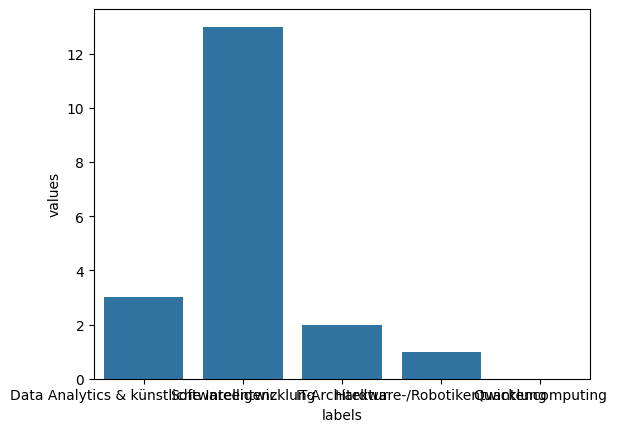

In [13]:
sns.barplot(data = df_chart
            ,x = 'labels'
            ,y = 'values'
            )